<div style="border:solid green 2px; padding: 20px">
    
<b>Hello, Elvis!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

# TRIPLE TEN BOOTCAMP

## SPRINT 5: INTEGRATED PROJECT 1

## **TITLE**: Predicting Video Game Success for ICE( A Data-Driven Approach)

## OBJECTIVES
* Identify key factors influencing video game sales.
* Describe variations in market trends
* Test hypothesis to inform advertising campaign for upcoming releases.

## INTRODUCTION

This project analyzes video game data from 2016, including reviews, genres, platforms, and ESRB ratings, to predict game success.  The goal is to uncover patterns that correlate with high sales, enabling Ice to identify potential hit games and optimize its 2017 advertising strategy.


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). 

In [1]:
# importing all necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [2]:
# loading the csv file
df_games = pd.read_csv("/datasets/games.csv")
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# summary of the data
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# converting(renaming) the columns of the data to lowercases
df_games = df_games.rename(columns=str.lower)
df_games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# converting the dat to the required types
df_games['year_of_release'] = pd.to_datetime(df_games['year_of_release'],format='%Y')
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)
df_games['user_score'] = df_games['user_score'].astype('float64')
# df_games['rating'] = df_games['rating'].astype('category')

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

That's right, tbd is the same in meaning as skip

I have converted the year_of_release for float to dateime, because it not advisable for time to be treated like a number.

Just like the critic _score that is a float, I deemed it correct for thr user_score to be same.

Finally, the rating is coverted to category dtype so that it will be easy to manipulate when ploting graphs.

In [6]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


In [7]:
# Checking duplicated rows
df_games.duplicated().sum()

0

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №1__
    
Duplicate checking is the basis of data preprocessing

In [8]:
# checking missing values 
df_games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

The name and genre columns have just 2 missing values out of the 16715 entries, I will drop the row with these values.

The year is not a time series(data is not sorted according to year), I will fill the missing value with the mode year.

The critic_score, user_score and rating, have too many missing value. Replacing such values can affected the data heavily.


In [9]:
# filling missing values 

# dropping the rows of the missing valuess for name and genre
df_games.dropna(subset=['name', 'genre','year_of_release'], inplace=True)
# calculating the mode of the year_of_release
# mode_year = df_games['year_of_release'].mode()[0]
# # filling missing values of the year_of_release with the mode
# df_games['year_of_release'].fillna(mode_year, inplace=True)
# # filling missing values accordingly 
# df_games['critic_score'].fillna(-1, inplace=True)
# df_games['user_score'].fillna(-1, inplace=True)
# df_games['rating'].fillna('Unknown', inplace=True)
# df_games['rating'] = df_games['rating'].astype('category')
# df_games.dropna(inplace = True)

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Substituting missing values for the median/zero/mode can skew the data and introduce some problem in further analysis. Let me elaborate on the causes and consequences of this approach.

1. distortion of the distribution: When we replace missing values with the median, we are actually adding new values to the data set. This can lead to a shift in the distribution and distort the statistical properties of the data. Replacing by the median can make the data look more homogeneous than it actually is.

2. Possible consequences: Substituting missing values for the median can affect many aspects of data analysis:

   - Statistical tests: Distorted data can lead to incorrect conclusions in statistical tests. The use of skewed data can lead to incorrect results in significance tests and estimation of effects between groups or conditions.

   - Modeling: When distorted data are used to build models, models may also suffer from distortion and produce incorrect predictions or conclusions. This can be particularly important if missing values are associated with key model variables.

   - Inferences and interpretation: Distorted data can lead to incorrect inferences and misinterpretation of results. For example, if missing values are associated with important factors, replacing with the median may lead to misunderstanding the effect of these factors on the variable under study.


 So, instead of replacing missing values with median, it is recommended to apply other approaches to handle missing data such as:

- Removing records with missing values: If the number of records with missing values is small compared to the total amount of data, deleting these records may be a reasonable approach.

- Data Imputation: Using more sophisticated techniques such as data imputation can help recover missing values based on other variables in the dataset.For example, machine learning models can be used to predict missing values based on the available data.
It is important to assess the reason for missing values and choose an approach to handle them based on the specifics of the data and the objectives of the study.Proper handling of missing values helps to maintain the accuracy and reliability of data analysis.
   


<div class="alert alert-info">
    <b>Student сomments 1:       From the above review, I chose to drop all missing values  </b> </div>


<div class="alert alert-block alert-success">✔️

__Reviewer's comment №2__
    
Lines with gaps in the Name are best deleted. We know almost nothing about these games.

In [10]:
# checking if there are still missing values 
df_games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [11]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       7463 non-null   float64       
 10  rating           9768 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


In [12]:
# df_games['Year_of_Release'] = pd.to_datetime(df_games['Year_of_Release'], errors='coerce')
# df_games.dropna(inplace=True)
# df_games.drop_duplicates(inplace=True)
# df_games.rename(columns={'User_Score': 'user_score', 'Critic_Score': 'critic_score', 'NA_Sales': 'na_sales', 'EU_Sales': 'eu_sales', 'JP_Sales': 'jp_sales', 'Other_Sales': 'other_sales'}, inplace=True)
# df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [13]:
# creating a column total sales 
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [14]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       7463 non-null   float64       
 10  rating           9768 non-null   object        
 11  total_sales      16444 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.6+ MB


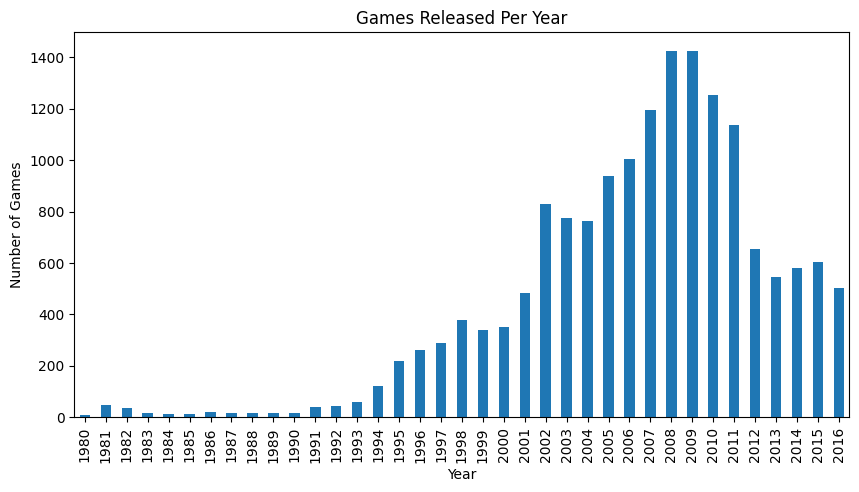

In [15]:
# games realeased per year
games_per_year = df_games['year_of_release'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 5))
games_per_year.plot(kind='bar')
plt.title('Games Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

<div class="alert alert-block alert-warning">📝

__Reviewer's comment №1__
    

It would be nice to add visualizations. In order to build a graph, you need to group the data (in our case, the year of release and quantity)
    
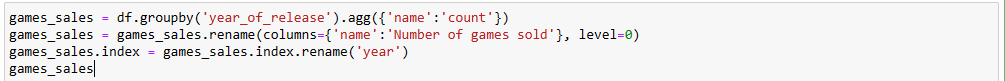
    
---
Next, using the sns library (it's powerful, and you can do anything with it). From the data in the grouped table, plot the graph. You can have it if you want =) The main thing is to play around with the arguments and figure it out. In future projects you will build powerful graphs, this skill will come in handy there    
    
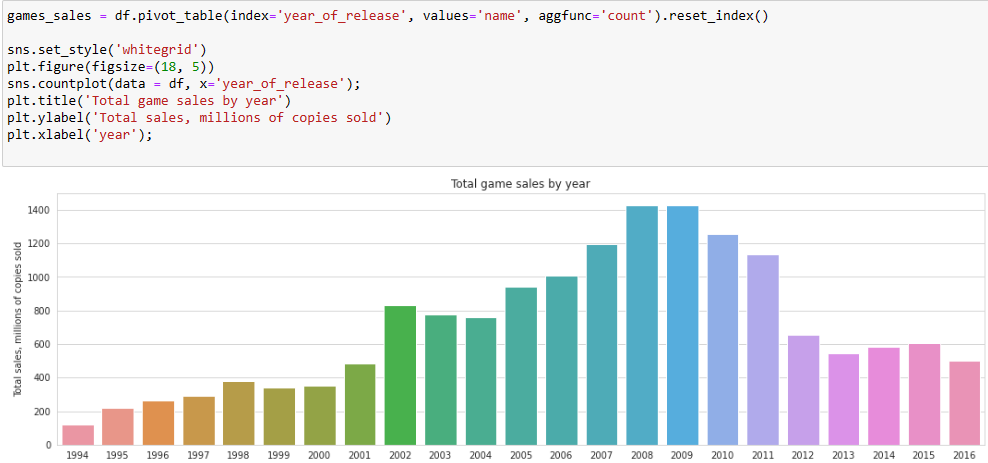
</div>

The chart is skew to the right with a left tail
The chart illustrates the number of games released each year from 1980 to 2016.  There's a clear upward trend in the number of games released over this period, indicating significant growth in the gaming industry.

The highest number of releases occurred around 2008 and 2009.

The upward trend, with a peak around 2008 and a subsequent decline, highlights key phases in the industry's development and invites further investigation into the underlying factors driving these changes.

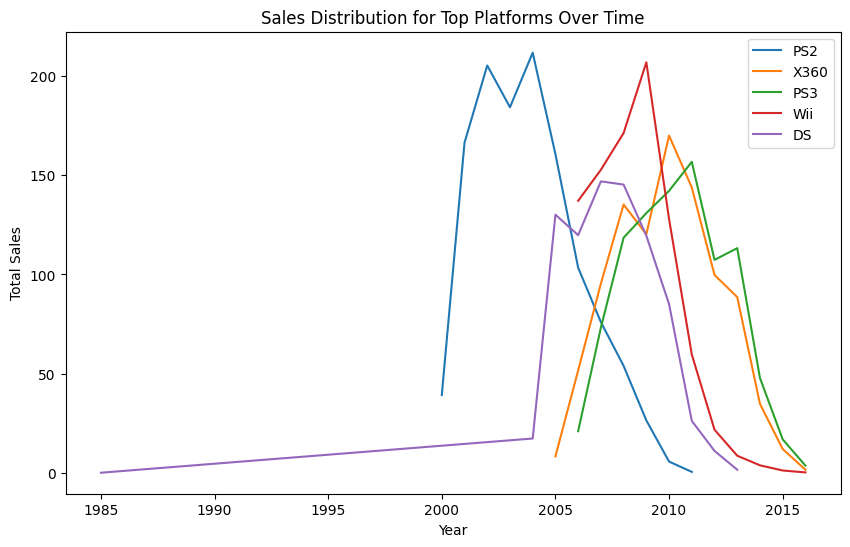

In [16]:
# sales by platform
sales_by_platform = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = sales_by_platform.head(5).index  # Choose top platforms
plt.figure(figsize=(10, 6))
for platform in top_platforms:
    platform_data = df_games[df_games['platform'] == platform].groupby(df_games['year_of_release'].dt.year)['total_sales'].sum()
    plt.plot(platform_data.index, platform_data.values, label=platform)
plt.title('Sales Distribution for Top Platforms Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

Strange 1985 outlier for DS, you can see when the platform was released to the market, it is worth removing the anomaly (may affect the calculation of the average relevance period of platforms)

* Visually, it's clear that the PS2 and X360 appear to have the greatest total sales over their respective lifespans.
* PS2 dominated the early 2000s. It had a long, sustained peak, indicating very high sales volumes for many years. Sales started rising in the early 2000s, peaked in the mid-2000s, and then gradually declined
* X360  had a strong showing in the mid-to-late 2000s. Its rise was steeper than the PS2's, but its peak was shorter and not as high. Sales started rising in the mid-2000s, peaked in the late 2000s, and declined more rapidly than the PS2.
* PS2 sales are very close to zero by 2016.
* X360 , PS3, Wii and DS sales are also near zero.
* Looking at the chart, new platforms tend to emerge every few years. For example, the PS2 appeared a few years before the X360 and Wii. The PS3 followed later. This suggests a cycle of roughly 5-7 years for major platform releases, though it's not a strict pattern.


In [17]:
# defining and working with relevant data
# df_relevant = df_games[df_games['year_of_release'].dt.year >= 2010]
# df_relevant.head()
df_relevant = df_games[df_games['year_of_release'].dt.year.isin([2014, 2016])]
df_relevant.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
92,Call of Duty: Advanced Warfare,PS4,2014-01-01,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016-01-01,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014-01-01,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55


<div class="alert alert-block alert-danger">✍

__Reviewer's comment №1__


For the purpose of predicting sales for the next year, even traditional businesses rarely take data for more than 2-3 years. And in such a dynamically changing industry as computer games, you shouldn't take too long a time interval - otherwise you're bound to capture trends that are already outdated. But you shouldn't take too short a period either

<div class="alert alert-info"> <b>Student сomments 1:</b> I have changed the years to include only 2014, 2015 and 2016 </div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

All right

In [18]:
# Leading/growing/shrinking platforms
sales_2015 = df_relevant[df_relevant['year_of_release'].dt.year == 2015].groupby('platform')['total_sales'].sum()
sales_2016 = df_relevant[df_relevant['year_of_release'].dt.year == 2016].groupby('platform')['total_sales'].sum()

sales_change = sales_2015 - sales_2016
print("\nSales Change (2015 - 2016):\n", sales_change)


Sales Change (2015 - 2016):
 platform
3DS    NaN
PC     NaN
PS3    NaN
PS4    NaN
PSV    NaN
Wii    NaN
WiiU   NaN
X360   NaN
XOne   NaN
Name: total_sales, dtype: float64


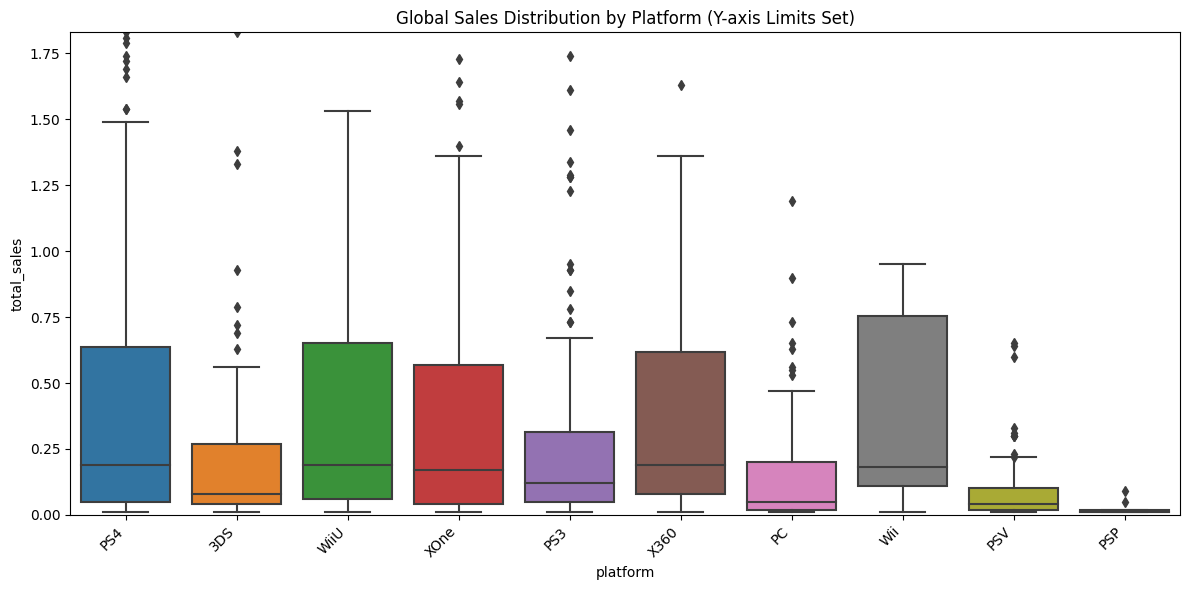


Average Sales by Platform:
 platform
3DS     0.467460
PC      0.183465
PS3     0.351781
PS4     0.708159
PSP     0.024000
PSV     0.087297
Wii     0.561429
WiiU    0.591778
X360    0.477105
XOne    0.542027
Name: total_sales, dtype: float64


In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df_relevant)
plt.title('Global Sales Distribution by Platform (Y-axis Limits Set)')
plt.xticks(rotation=45, ha='right')

# Calculate a reasonable upper limit for the y-axis(95th percentile)
upper_limit = df_relevant['total_sales'].quantile(0.95)

plt.ylim(0, upper_limit) # Set Y-axis limit

plt.tight_layout()
plt.show()
# Significance: Analyze the box plot.  Do the medians and interquartile ranges vary significantly across platforms?
print("\nAverage Sales by Platform:\n", df_relevant.groupby('platform')['total_sales'].mean())

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Unfortunately, this graph only shows the outliers, and does not show the median and 75% quantile. For more reasonable conclusions it is necessary to make an additional graph, where only the lower part of the boxplots will be displayed. This can be achieved, for example, by setting the parameter ylim
</div>

<div class="alert alert-info"> <b>Student сomments 1:</b> I have adjusted the box blot to show  more of values than outliers </div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Great!

Again, PS4 and X360 have outstanding sales 

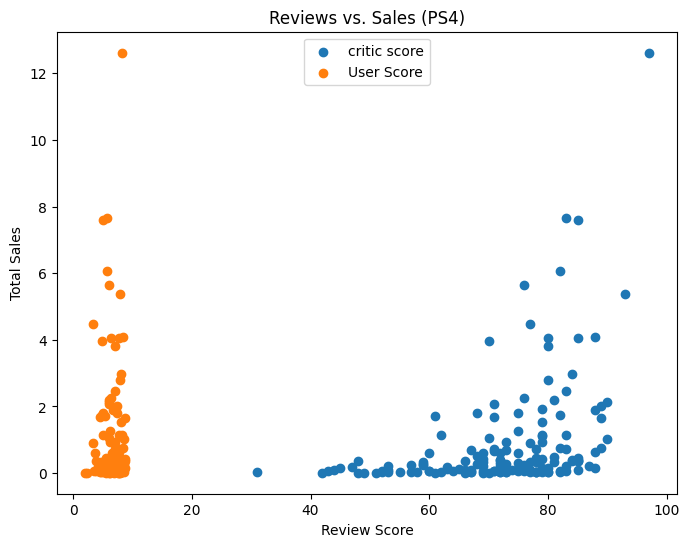

In [20]:
# Reviews vs. Sales
# chsing PSA as the the popular 
ps4_data = df_relevant[df_relevant['platform'] == 'PS4']
plt.figure(figsize=(8, 6))
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], label='critic score')
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], label='User Score')
plt.title('Reviews vs. Sales (PS4)')
plt.xlabel('Review Score')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [21]:
correlation_critic = ps4_data['critic_score'].corr(ps4_data['total_sales'])
correlation_user = ps4_data['user_score'].corr(ps4_data['total_sales'])
print(f"\nCorrelation between Critic Score and Sales (PS4): {correlation_critic}")
print(f"Correlation between User Score and Sales (PS4): {correlation_user}")


Correlation between Critic Score and Sales (PS4): 0.400201644300356
Correlation between User Score and Sales (PS4): -0.06152131184896319


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__
    
    
The assignment is to relate the conclusions to the sales of games on other platforms, because the conclusions based on calculations across multiple platforms look "weightier" and more convincing
</div>

<div class="alert alert-info"> <b>Student сomments 1:</b> Noted Sir</div>

* There is weak positive corelation between Critic Score and Sales (PS4) and User Score and Sales (PS4)


Genre Distribution:
 Action          366
Role-Playing    143
Adventure       131
Sports          102
Shooter          94
Misc             74
Racing           51
Fighting         39
Simulation       29
Platform         25
Strategy         21
Puzzle            8
Name: genre, dtype: int64


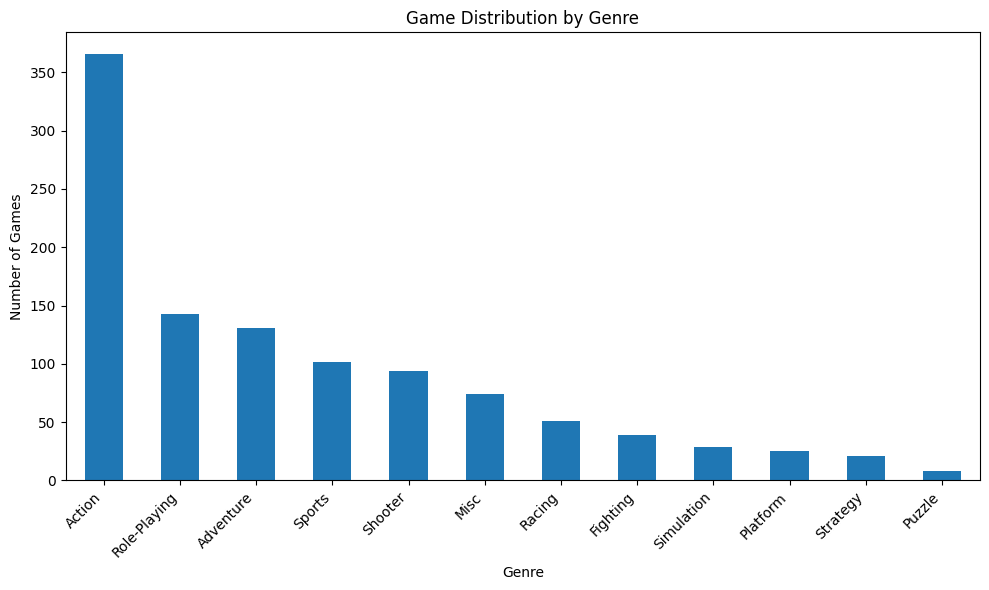


Total Sales by Genre:
 genre
Shooter         0.465
Sports          0.250
Platform        0.140
Fighting        0.130
Role-Playing    0.110
Action          0.100
Racing          0.080
Misc            0.075
Strategy        0.060
Simulation      0.050
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64


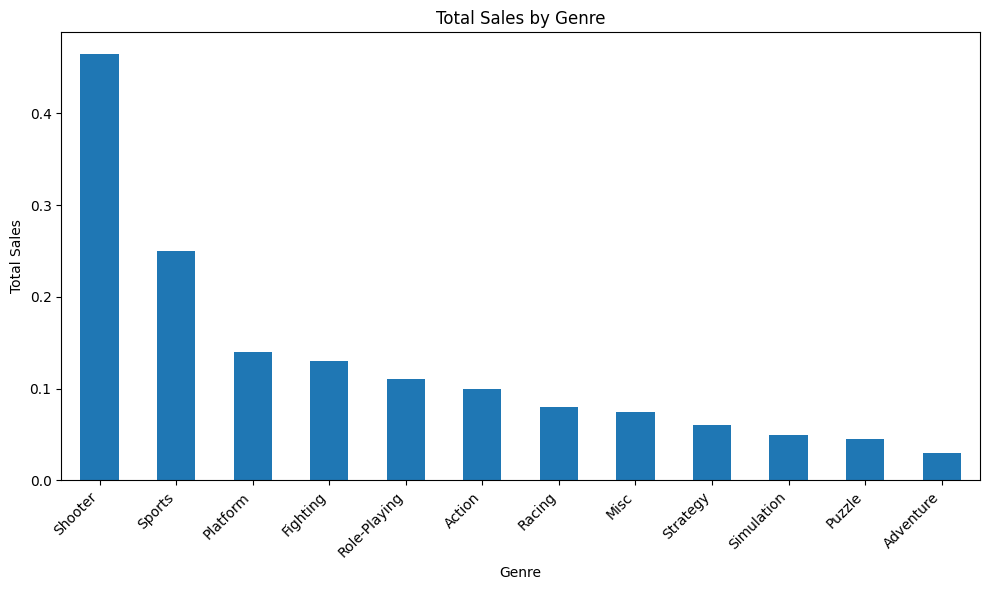

In [27]:
# Genre distribution and sales:
genre_distribution = df_relevant['genre'].value_counts()
print("\nGenre Distribution:\n", genre_distribution)

plt.figure(figsize=(10, 6))
genre_distribution.plot(kind='bar')
plt.title('Game Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


genre_sales = df_relevant.groupby('genre')['total_sales'].median().sort_values(ascending=False)
print("\nTotal Sales by Genre:\n", genre_sales)

plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* The plot has a right skew and the tail to the left, with action genre toping the sales.
* The Puzzle genre has lowest number of sales.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Your calculations need to be supplemented a little more. Total sales is a poor metric for finding the most profitable genre. High overall sales numbers can hide a lot of small games with low sales. Or 2-3 stars and a bunch of failures. It's better to find a genre where games consistently bring in high revenue - for that it's worth considering average or median sales
    
---
    
Ideally, visualize the data distribution using boxplot()
</div>

<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Brilliant!


Top Platforms (NA_SALES):
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64


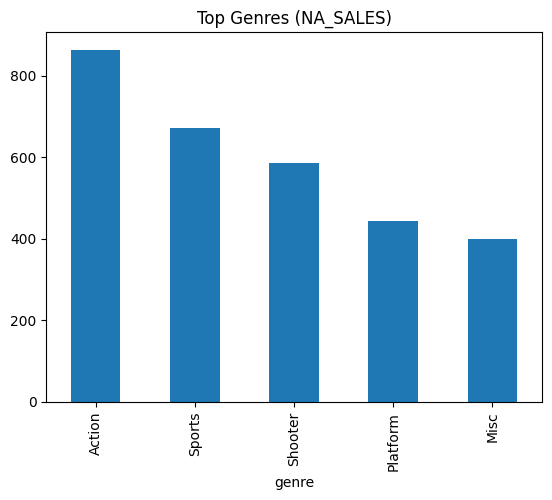


Top Platforms (EU_SALES):
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64


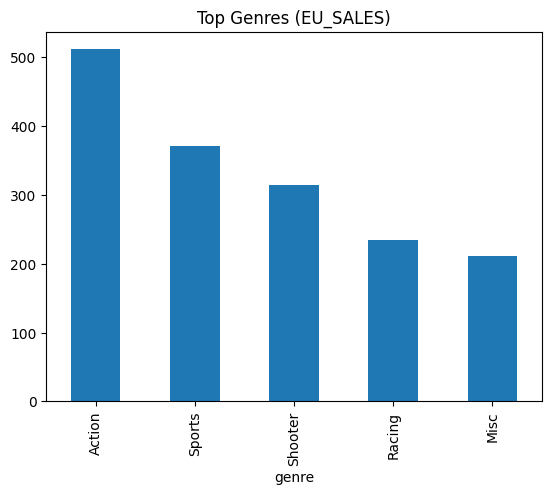


Top Platforms (JP_SALES):
platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


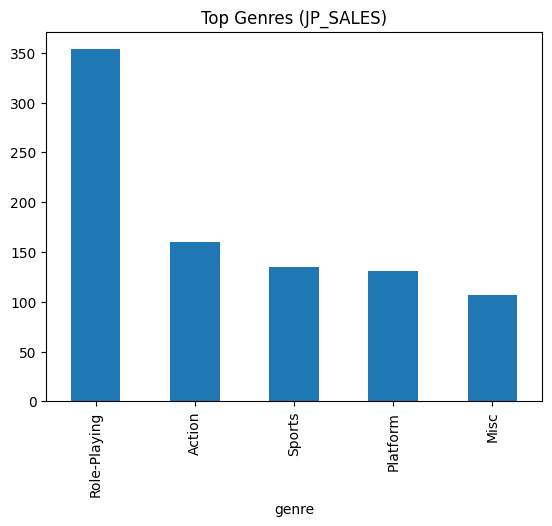

In [23]:
# Region-specific analysis:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    top_platforms = df_games.groupby('platform')[region].sum().nlargest(5)
    top_genres = df_games.groupby('genre')[region].sum().nlargest(5)

    print(f"\nTop Platforms ({region.upper()}):\n{top_platforms}")
    top_genres.plot(kind='bar', title=f'Top Genres ({region.upper()})').plot()
    plt.show()

* Action games have the highest and Misc the lowest when it comes to the sales in the NA and the EU resgion
* For the JP regions, Role-Playing games dominate but Misc is still the lowest.

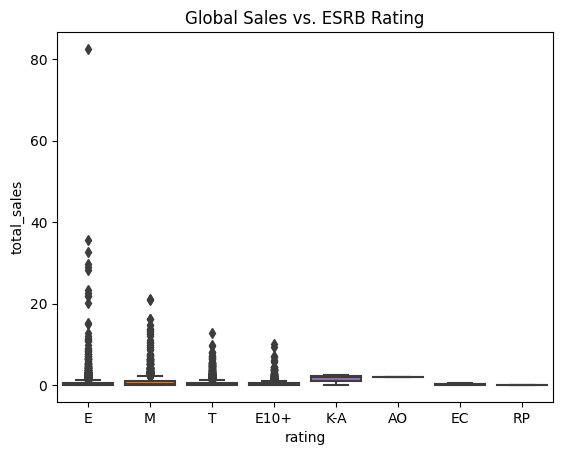

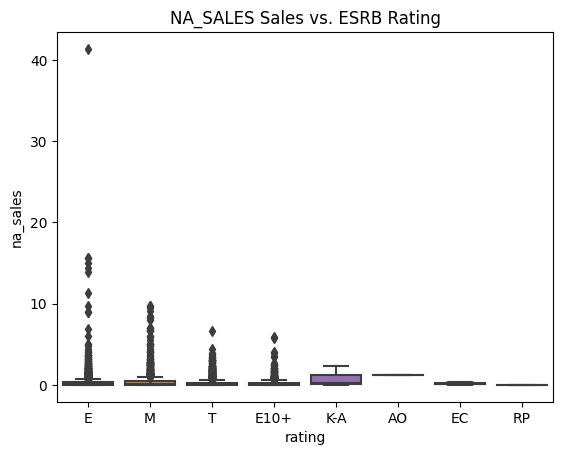


Median NA_SALES Sales by Rating:
rating
AO      1.260
E       0.120
E10+    0.120
EC      0.155
K-A     0.260
M       0.140
RP      0.000
T       0.110
Name: na_sales, dtype: float64


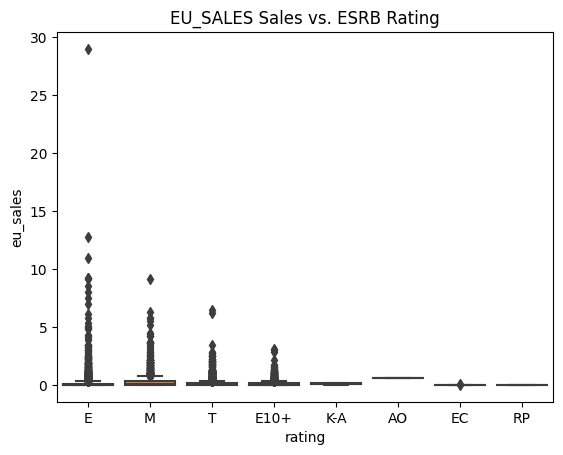


Median EU_SALES Sales by Rating:
rating
AO      0.61
E       0.03
E10+    0.03
EC      0.00
K-A     0.10
M       0.09
RP      0.03
T       0.04
Name: eu_sales, dtype: float64


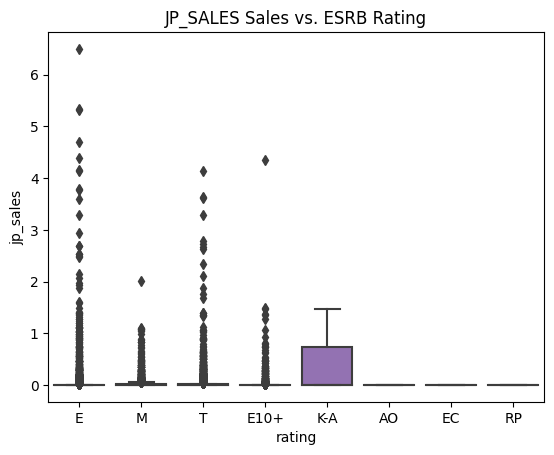


Median JP_SALES Sales by Rating:
rating
AO      0.0
E       0.0
E10+    0.0
EC      0.0
K-A     0.0
M       0.0
RP      0.0
T       0.0
Name: jp_sales, dtype: float64


In [24]:
# ESRB effect on sales:
sns.boxplot(x='rating', y='total_sales', data=df_games).plot()
plt.title('Global Sales vs. ESRB Rating')
plt.show()

for region in regions:
    sns.boxplot(x='rating', y=region, data=df_games).plot()
    plt.title(f'{region.upper()} Sales vs. ESRB Rating')
    plt.show()
    print(f"\nMedian {region.upper()} Sales by Rating:\n{df_games.groupby('rating')[region].median()}")

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

Please correct the conclusions after correcting the actual period

The median rating for the 

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct interpretation of the Null and Alternative hypotheses

In [25]:
# Xbox One vs. PC user ratings:
# H0 : There is no significant difference in the average user ratings for games on Xbox One and PC
# H1 : There is a significant difference in the average user ratings for games on Xbox One and PC 
xbox_one_ratings = df_relevant[df_relevant['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = df_relevant[df_relevant['platform'] == 'PC']['user_score'].dropna()

# Independent samples t-test (assuming unequal variances):
t_statistic, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)  # Welch's t-test
print(f"\nXbox One vs. PC User Ratings:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level (explained below)
if p_value < alpha:
    print("Reject the null hypothesis: Average user ratings are different.")
else:
    print("Fail to reject the null hypothesis: Average user ratings are the same.")


Xbox One vs. PC User Ratings:
T-statistic: 1.5767588717138317
P-value: 0.11685522624212856
Fail to reject the null hypothesis: Average user ratings are the same.


* Here we have two seperate groups, Xbox One and PC users and we are comparing the mean of these two groups
* in both cases I have chose 0.05 as the p value, meaning that there is a 5% chance of rejecting the null hypothesis

In [26]:
# Action vs. Sports user ratings:
# H0: Average user ratings for Action and Sports genres are the same.
# H1: Average user ratings for Action and Sports genres are different.
action_ratings = df_relevant[df_relevant['genre'] == 'Action']['user_score'].dropna()
sports_ratings = df_relevant[df_relevant['genre'] == 'Sports']['user_score'].dropna()

t_statistic, p_value = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False) # Welch's t-test
print(f"\nAction vs. Sports User Ratings:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: Average user ratings are different.")
else:
    print("Fail to reject the null hypothesis: Average user ratings are the same.")


Action vs. Sports User Ratings:
T-statistic: 5.759392982109993
P-value: 6.013845149784432e-08
Reject the null hypothesis: Average user ratings are different.


# CONCLUSION
This project analyzed video game sales data to identify key trends. We examined game releases over time, platform popularity, genre influence, and the impact of reviews on sales.  Our findings revealed insights into platform lifecycles, genre profitability, and the correlation between reviews and commercial success.  These insights can inform decisions for game developers and industry analysts.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

    
Please correct the conclusions after correction

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊